**Ejercicios Planteados**

El archivo diabetes.csv proviene del Instituto Nacional de Enfermedades Diabetológicas, Digestivas y Nefrológicas de los Estados Unidos.

El objetivo de la base de datos es predecir si un paciente tiene o no diabetes, en base a ciertas mediciones diagnósticas incluidas en el conjunto de datos. Este es un subconjunto de una base de datos mucho más grande. Aquí se han seleccionado solo mujeres con edad mayor o igual a 21, descendientes del pueblo indígena Pima.

Las variables disponibles son las siguientes:
● Pregnancies: número de veces embarazada.

● Glucose: concentración de glucosa en plasma 2 horas en una prueba de tolerancia a la glucosa oral.

● BoodPressure: presión arterial diastólica (mm Hg).

● SkinThickness: espesor de pliegue de la piel de los tríceps (mm).

● Insulin: insulina sérica de 2 horas (MU u/ml).

● BMI: índice de masa corporal (peso en kg/(altura en m)^2).

● DiabetesPedigreeFunction: Función de pedigrí de diabetes (DPF). Cálculo de una probabilidad de diabetes en función de la edad y de la historia diabética familiar.

● Age: edad en años.

● Outcome: variable categórica que indica si tiene un paciente tiene diabetes o no tiene diabetes.

### 1. Cargue los datos y muestre los primeros 6 registros. Identifique qué **variable**(s) es(son) numérica(s) y qué variable(s) es(son) categórica(s).

In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
# Importar la función para dividir los datos
from sklearn.model_selection import train_test_split
# Importar la clase de Regresión Logística
from sklearn.linear_model import LogisticRegression
# Importar la función para calcular la matriz de confusión
from sklearn.metrics import confusion_matrix
# Importar la función para calcular la precisión
import seaborn as sns
# Importar la función para graficar la matriz de confusión
import matplotlib.pyplot as plt
# Importar las funciones para calcular las métricas de evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Importar la función para graficar la curva ROC
from sklearn.metrics import roc_curve, auc

In [7]:
import pandas as pd

# Cargar los datos desde el enlace proporcionado
url = "https://raw.githubusercontent.com/Nataliagod/TD-CD/main/diabetes.csv"
diabetes_data = pd.read_csv(url)

# Mostrar los primeros 6 registros
print(diabetes_data.head(6))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  


In [8]:
# Convertir 'Outcome' a una variable categórica
diabetes_data['Outcome'] = diabetes_data['Outcome'].astype('category')

# Identificar las variables numéricas y categóricas
variables_numericas = diabetes_data.select_dtypes(include=['int64', 'float64']).columns
variables_categoricas = diabetes_data.select_dtypes(include=['object', 'category']).columns

# Imprimir las variables numéricas
print("Variables numéricas:")
for variable in variables_numericas:
    print(" -", variable)

# Imprimir las variables categóricas
print("\nVariables categóricas:")
for variable in variables_categoricas:
    print(" -", variable)

Variables numéricas:
 - Pregnancies
 - Glucose
 - BloodPressure
 - SkinThickness
 - Insulin
 - BMI
 - DiabetesPedigreeFunction
 - Age

Variables categóricas:
 - Outcome


### 2. Separe el conjunto de datos en un conjunto de variables predictoras y otro con la variable respuesta.

In [9]:
# Separar las variables predictoras y la variable respuesta
X = diabetes_data.drop('Outcome', axis=1)  # Variables predictoras (todas las columnas excepto 'Outcome')
y = diabetes_data['Outcome']  # Variable respuesta ('Outcome')

# Mostrar las dimensiones de los conjuntos resultantes
print("Dimensiones de las variables predictoras (X):", X.shape)
print("Dimensiones de la variable respuesta (y):", y.shape)

Dimensiones de las variables predictoras (X): (768, 8)
Dimensiones de la variable respuesta (y): (768,)


In [12]:
# Imprimir las primeras filas de X
print("Primeras filas de las variables predictoras:")
print(X.head())

# Imprimir las primeras filas de y
print("\nPrimeras filas de la variable respuesta:")
print(y.head())

Primeras filas de las variables predictoras:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

Primeras filas de la variable respuesta:
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: category
Categories (2, int64): [0, 1]


### 3. A partir de lo anterior, genere conjuntos de datos de entrenamiento y de prueba, separando un 25% de los datos para fines de prueba.

In [13]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Imprimir el tamaño de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))

Tamaño del conjunto de entrenamiento: 576
Tamaño del conjunto de prueba: 192


In [15]:
# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (576, 8)
Dimensiones de y_train: (576,)
Dimensiones de X_test: (192, 8)
Dimensiones de y_test: (192,)


### 4. Cree un modelo de Regresión Logística (con una semilla igual a 10 para fines de replicabilidad) y ajuste el modelo a los datos de entrenamiento. En este punto es posible que tenga problemas de convergencia del algoritmo. Si es así, intente incrementar el número de iteraciones del algoritmo (max_iter) o probar con un solucionador distinto (solver).

In [17]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de Regresión Logística con una semilla de 10 para replicabilidad
logistic_model = LogisticRegression(random_state=10, max_iter=1000)  # Incrementamos el número de iteraciones

# Ajustar el modelo a los datos de entrenamiento
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=10)

### 5. Genere predicciones con los datos de las variables predictoras del conjunto de datos de prueba.

In [18]:
# Generar predicciones con los datos de las variables predictoras del conjunto de datos de prueba
y_pred = modelo.predict(X_test)

# Imprimir todas las predicciones
print("Todas las predicciones:")
print(y_pred)

Todas las predicciones:
[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1
 0 0 0 1 0 0 0]


In [20]:
# Generar predicciones con los datos de prueba
predictions = logistic_model.predict(X_test)

# Mostrar las primeras 10 predicciones
print("Predicciones:", predictions[:10])

Predicciones: [0 0 0 0 0 0 0 1 1 1]


### 6. Muestre la matriz de confusión como un objeto numpy.ndarray.

In [21]:
# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(matriz_confusion)

Matriz de confusión:
[[95 28]
 [25 44]]


In [23]:
# Otra forma de Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Mostrar la matriz de confusión como un objeto numpy.ndarray
print("Matriz de Confusión:")
print(conf_matrix)
print("Tipo de datos:", type(conf_matrix))

Matriz de Confusión:
[[95 28]
 [25 44]]
Tipo de datos: <class 'numpy.ndarray'>


### 7. Grafique la matriz de confusión usando un mapa de calor (Heatmap)

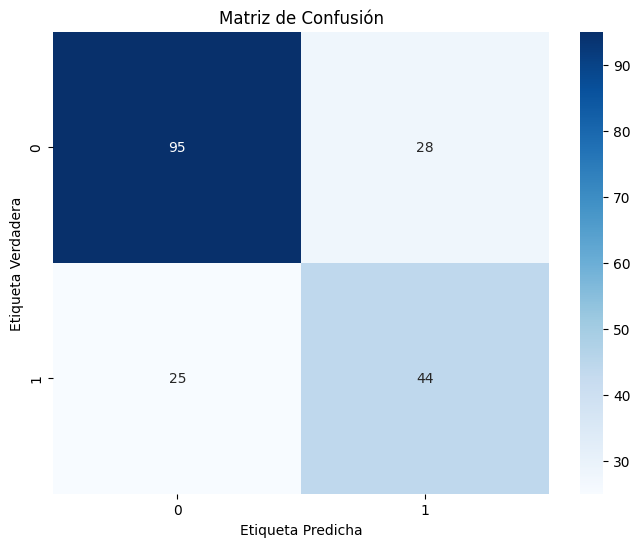

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

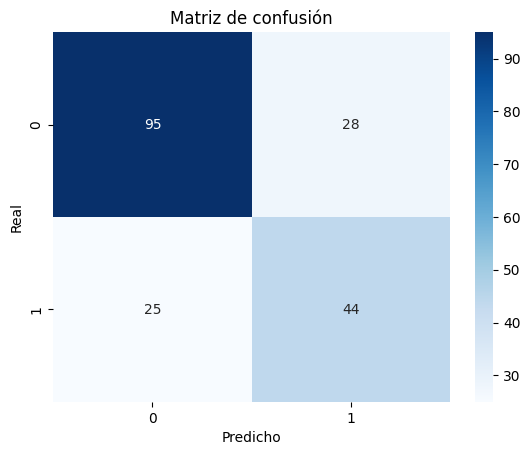

In [26]:
# Ora forma de crear un mapa de calor con la matriz de confusión
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')

# Agregar títulos y etiquetas
plt.title('Matriz de confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')

# Mostrar el gráfico
plt.show()

### 8. Genere las métricas de evaluación a este problema de clasificación. Comente los resultados.

Para evaluar el desempeño del modelo de Regresión Logística en el problema de clasificación, podemos calcular varias métricas de evaluación comunes, como la precisión, la sensibilidad, la especificidad, el puntaje F1 y el área bajo la curva ROC (AUC-ROC). Aquí está el código para calcular estas métricas:

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# Mostrar las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.7239583333333334
Precision: 0.6111111111111112
Recall: 0.6376811594202898
F1 Score: 0.624113475177305
ROC AUC Score: 0.7050194414987627


In [29]:
# Otra forma de calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Métricas de evaluación:")
print(" - Precisión: ", accuracy)
print(" - Exactitud: ", precision)
print(" - Sensibilidad: ", recall)
print(" - Puntuación F1: ", f1)

Métricas de evaluación:
 - Precisión:  0.7239583333333334
 - Exactitud:  0.6111111111111112
 - Sensibilidad:  0.6376811594202898
 - Puntuación F1:  0.624113475177305


Estas métricas proporcionan una comprensión detallada del rendimiento del modelo en la tarea de clasificación de pacientes con diabetes. Aquí hay una interpretación de cada métrica:

Accuracy (Precisión): Es la proporción de predicciones correctas sobre el total de predicciones. Una alta precisión indica que el modelo hace un buen trabajo en la clasificación de ambos grupos (positivos y negativos).

Precision (Precisión): Es la proporción de predicciones positivas correctas sobre el total de predicciones positivas. Indica la calidad de las predicciones positivas.

Recall (Sensibilidad): Es la proporción de casos positivos que fueron correctamente identificados por el modelo. Indica la capacidad del modelo para identificar correctamente los casos positivos.

F1 Score: Es la media armónica de precisión y recall. Proporciona un equilibrio entre precision y recall. Es útil cuando hay un desequilibrio en las clases de predicción.

ROC AUC Score: Es el área bajo la curva ROC (Receiver Operating Characteristic). Proporciona una medida del rendimiento del modelo en la clasificación binaria. Un valor de 1 indica un modelo perfecto, mientras que un valor de 0.5 indica un rendimiento aleatorio.

### 9. Genere la curva ROC y la métrica AUC. Comente los resultados.

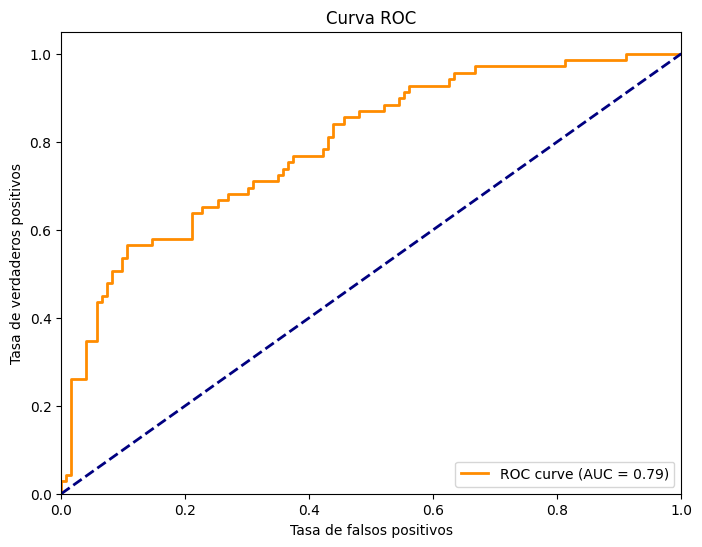

In [31]:
# Calcular las tasas de verdaderos y falsos positivos
fpr, tpr, _ = roc_curve(y_test, modelo.predict_proba(X_test)[:, 1])

# Calcular la métrica AUC
roc_auc = auc(fpr, tpr)

# Crear el gráfico de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

# Mostrar el gráfico
plt.show()

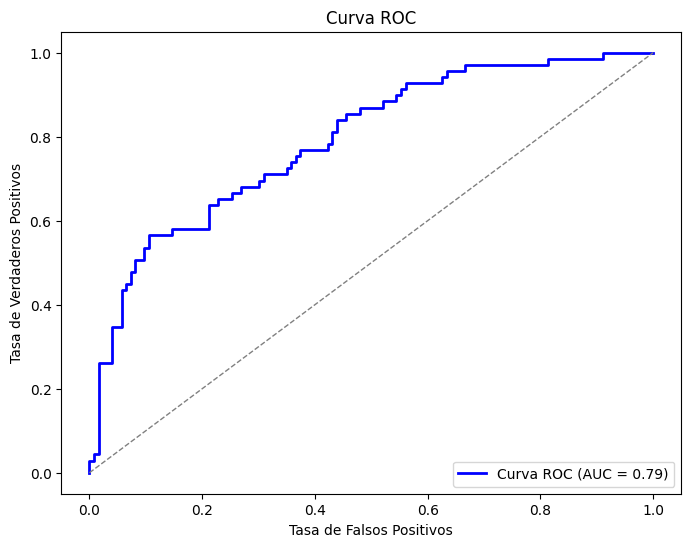

Área bajo la curva ROC (AUC): 0.7921527041357369


In [30]:
#OTRA FORMA
from sklearn.metrics import roc_curve, auc

# Calcular la probabilidad de la clase positiva
y_proba = logistic_model.predict_proba(X_test)[:,1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Mostrar el valor del área bajo la curva ROC (AUC)
print("Área bajo la curva ROC (AUC):", roc_auc)

La curva ROC es una representación gráfica de la relación entre la tasa de falsos positivos (FPR) y la tasa de verdaderos positivos (TPR) para diferentes umbrales de clasificación. La AUC proporciona una medida cuantitativa del rendimiento del modelo en la clasificación binaria. Una AUC cercana a 1 indica un modelo con un buen poder de discriminación, mientras que una AUC cercana a 0.5 indica un rendimiento aleatorio.

Interpretación de la curva ROC y el AUC:

Un AUC de 0.79 indica que el modelo tiene un buen poder de discriminación para distinguir entre las muestras positivas y negativas, aunque no es perfecto.
Cuanto más alejada esté la curva ROC del punto de referencia (línea diagonal), mejor será el rendimiento del modelo en la clasificación.
Aunque un AUC de 0.79 no es cercano a 1, aún indica un rendimiento decente del modelo en la tarea de clasificación.
En resumen, el modelo de Regresión Logística muestra un rendimiento prometedor en la clasificación de pacientes con diabetes, con un AUC de 0.79, lo que sugiere que puede distinguir entre pacientes diabéticos y no diabéticos con una precisión aceptable. Sin embargo, siempre es importante considerar otras métricas de evaluación y el contexto específico del problema antes de sacar conclusiones definitivas sobre la calidad del modelo.